***TP*** ***Supervised*** ***learning***

## **1.Importation des bibliothèques**


In [21]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


## **2. Chargement des données et Analyse des données**

In [22]:
churn = pd.read_csv(r'c:\Users\asus\Documents\GénieInfo\AI\Churn_Modelling.csv',sep = ',', header=0)
churn.head(10)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,0,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,0,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,1,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,0,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,0,27,2,134603.88,1,1,1,71725.73,0


In [23]:
type(churn)
churn.shape

(10000, 11)

In [24]:
X = churn.iloc[:,1:10].values
Y = churn.iloc[:,10].values

In [25]:
X.shape

(10000, 9)

In [26]:
Y.shape

(10000,)

Visualisation des données avec matplotlib:

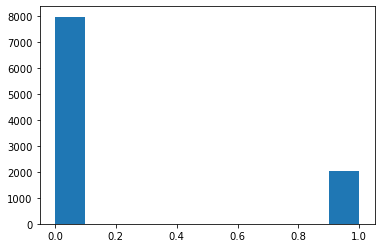

In [27]:
plt.hist(Y)
plt.show()

In [28]:
ep = np.sum(Y == 1)/len(Y)
nep = np.sum(Y == 0)/len(Y)
print('Excited : {0:.3f} et Non : {1:.3f}'.format(ep,nep))


Excited : 0.204 et Non : 0.796


# **3. Séparation des données**


In [29]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [30]:
Xtrain.shape

(7500, 9)

In [31]:
Ytrain.shape

(7500,)

In [32]:
Xtest.shape

(2500, 9)

In [33]:
Ytest.shape

(2500,)

# **4. Apprentissage et Evaluation de modeles(Algorithmes)**


# **////ALGORITHME 1**

In [34]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(Xtrain, Ytrain)
DTC.score(Xtest, Ytest)
 

0.7848

Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [35]:
#def ClassifieurExcited (Xtrain, Xtest, Ytrain, Ytest):
#print('DecisionTreeClassifier')
#DT = DecisionTreeClassifier(random_state=0, criterion='entropy')
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(Xtrain, Ytrain)
#DT.predict(Xtest)
YDTC = DTC.predict(Xtest)#sans affecter cette ligne à une variable(YDT dans notre cas) elle nous renvoie le tableau des résultats
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YDTC), recall_score(Ytest, YDTC)))
print()
print('Matrice de Confusion')
print(confusion_matrix(Ytest, YDTC))
print()


Accuracy = 0.785
Recall = 0.479

Matrice de Confusion
[[1713  267]
 [ 271  249]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [36]:
accuracy11 = accuracy_score(Ytest, YDTC)
recall11 = recall_score(Ytest, YDTC)
scoreDTC1 = (accuracy11 + recall11)/2
print("Score Decision Tree = {0:.3f}".format(scoreDTC1))

Score Decision Tree = 0.632


**Algorithme 1.2 Decision tree par la méthode de l'entropie(ID3)**


In [37]:

DTC2 = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf = DTC2.fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.7944

In [38]:
YDTC2 = DTC2.predict(Xtest)
 
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YDTC2), recall_score(Ytest, YDTC2)))
print()

print('Matrice de Confusion')
print(confusion_matrix(Ytest, YDTC2))
print()

Accuracy = 0.794
Recall = 0.527

Matrice de Confusion
[[1712  268]
 [ 246  274]]



In [39]:
accuracy12 = accuracy_score(Ytest, YDTC2)
recall12 = recall_score(Ytest, YDTC2)
scoreDTC2 = (accuracy12 + recall12)/2
print("Score Decision Tree (méthode de l'entropie) = {0:.3f}".format(scoreDTC2))

Score Decision Tree (méthode de l'entropie) = 0.661


# **///ALGORITHME 2 (K-Nearest Neigbors)**

Importation de l'algorithme(depuis sklearn), appel à la fonction de l'algorithme

In [40]:
from sklearn import neighbors
knc = neighbors.KNeighborsClassifier(3)
knc.fit(Xtrain, Ytrain)
YKNC = knc.predict(Xtest)

Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [41]:
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YKNC), recall_score(Ytest, YKNC)))
print()
print('Matrice de Confusion')
print(confusion_matrix(Ytest, YKNC))
print()

Accuracy = 0.728
Recall = 0.129

Matrice de Confusion
[[1753  227]
 [ 453   67]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [42]:
accuracy2 = accuracy_score(Ytest, YKNC)
recall2 = recall_score(Ytest, YKNC)
scoreKNC = (accuracy2 + recall2)/2
print("Score Decision Tree = {0:.3f}".format(scoreKNC))


Score Decision Tree = 0.428


# **ALGORITHME 3 (Random Forest Classifier)**

Importation de l'algorithme(depuis sklearn), appel à la fonction de l'algorithme et Calcul de la moyenne des deux mesure(Accuracy, Recall)

ET

Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(Xtrain, Ytrain)
YRFC = rfc.predict(Xtest)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YRFC), recall_score(Ytest, YRFC)))
print()

print('Matrice de Confusion')
print(confusion_matrix(Ytest, YRFC))
print()

Accuracy = 0.855
Recall = 0.431

Matrice de Confusion
[[1913   67]
 [ 296  224]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [44]:
accuracy3 = accuracy_score(Ytest, YRFC)
recall3 = recall_score(Ytest, YRFC)
scoreRFC = (accuracy3 + recall3)/2
print("Random Forest Classifier = {0:.3f}".format(scoreRFC))

Random Forest Classifier = 0.643


# **ALGORITHME 4 (Ada Boost Classifier)**

Importation de l'algorithme(depuis sklearn), appel à la fonction de l'algorithme et Calcul de la moyenne des deux mesure(Accuracy, Recall)

ET

Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 1000, random_state = 1)
abc.fit(Xtrain, Ytrain)
YABC = abc.predict(Xtest)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YABC), recall_score(Ytest, YABC)))
print()

print('Matrice de Confusion:')
print(confusion_matrix(Ytest, YABC))
print()


Accuracy = 0.846
Recall = 0.444

Matrice de Confusion:
[[1885   95]
 [ 289  231]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [46]:
accuracy4 = accuracy_score(Ytest, YABC)
recall4 = recall_score(Ytest, YABC)
scoreABC = (accuracy4 + recall4)/2
print("Ada Boost Classifier = {0:.3f}".format(scoreABC))

Ada Boost Classifier = 0.645


# **ALGORITHME 5: Extra Trees Classifier**

Importation de l'algorithme(depuis sklearn), appel à la fonction de l'algorithme et Calcul de la moyenne des deux mesure(Accuracy, Recall)

ET

Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 1000, random_state = 1)
etc.fit(Xtrain, Ytrain)
YETC = etc.predict(Xtest)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YETC), recall_score(Ytest, YETC)))
print()
print("Matrice de Confusion:")
print(confusion_matrix(Ytest, YETC))
print()

Accuracy = 0.852
Recall = 0.417

Matrice de Confusion:
[[1912   68]
 [ 303  217]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [48]:
accuracy5 = accuracy_score(Ytest, YETC)
recall5 = recall_score(Ytest, YETC)
scoreETC = (accuracy5 + recall5)/2
print("Extra Trees Classifier = {0:.3f}".format(scoreETC))

Extra Trees Classifier = 0.634


# **ALGORITHME 6: Réseaux de Neurones (Multilayer Perceptron)**

Importation de l'algorithme(depuis sklearn), appel à la fonction de l'algorithme et Calcul de la moyenne des deux mesure(Accuracy, Recall)

ET


Affichage du accuracy, recall et la matrice de confusion(vp|fp, fn|vn) :

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(80, 40), max_iter=200, activation="logistic")
mlp.fit(Xtrain, Ytrain)


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(80, 40))

In [50]:
YMLP = mlp.predict(Xtest)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YMLP), recall_score(Ytest, YMLP)))
print()
print("Matrice de Confusion:")
print(confusion_matrix(Ytest, YMLP))
print()

Accuracy = 0.792
Recall = 0.000

Matrice de Confusion:
[[1980    0]
 [ 520    0]]



Calcul de la moyenne des deux mesure(Accuracy, Recall)

In [51]:
accuracy6 = accuracy_score(Ytest, YMLP)
recall6 = recall_score(Ytest, YMLP)
scoreMLP = (accuracy6 + recall6)/2
print("Multi-Layer Perceptron score = {0:.3f}".format(scoreMLP))

Multi-Layer Perceptron score = 0.396


## **5.Normalisation des données**

1.Importation des standards de normalisation

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

2.Normalisation

In [53]:
s_data=StandardScaler()
s_data.fit(Xtrain)
Xtrain_Norm = s_data.transform(Xtrain)
Xtest_Norm = s_data.transform(Xtest)


# **Algorithme Arbre de decision(par la méthode de l'entropie)**

In [54]:
DTC2_norm = DecisionTreeClassifier(random_state=0, criterion='entropy')
DTC2_norm.fit(Xtrain_Norm, Ytrain)
DTC2_norm.score(Xtest_Norm, Ytest)


0.7936

In [55]:
YDTC2_norm = DTC2_norm.predict(Xtest_Norm)#sans affecter cette ligne à une variable(YDT dans notre cas) elle nous renvoie le tableau des résultats
 
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YDTC2_norm), recall_score(Ytest, YDTC2_norm)))
print()

print('Matrice de Confusion')
print(confusion_matrix(Ytest, YDTC2_norm))
print()

Accuracy = 0.794
Recall = 0.523

Matrice de Confusion
[[1712  268]
 [ 248  272]]



In [56]:
accuracy12_norm = accuracy_score(Ytest, YDTC2_norm)
recall12_norm = recall_score(Ytest, YDTC2_norm)
scoreDTC2_norm = (accuracy12_norm + recall12_norm)/2
print("Score Decision Tree après norm = {0:.3f}".format(scoreDTC2_norm))

Score Decision Tree après norm = 0.658


# **Algorithme KNN**

In [57]:
knc_norm = neighbors.KNeighborsClassifier(3)
knc_norm.fit(Xtrain_Norm, Ytrain)
YKNC_norm = knc_norm.predict(Xtest_Norm)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YKNC_norm), recall_score(Ytest, YKNC_norm)))
print()
print('Matrice de Confusion')
print(confusion_matrix(Ytest, YKNC_norm))
print()

Accuracy = 0.823
Recall = 0.396

Matrice de Confusion
[[1852  128]
 [ 314  206]]



In [58]:
accuracy2_norm = accuracy_score(Ytest, YKNC_norm)
recall2_norm = recall_score(Ytest, YKNC_norm)
scoreKNC_norm = (accuracy2_norm + recall2_norm)/2
print("Score Decision Tree = {0:.3f}".format(scoreKNC_norm))

Score Decision Tree = 0.610


# **Algorithme RFC**

In [59]:
rfc_norm = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc_norm.fit(Xtrain_Norm, Ytrain)
YRFC_norm = rfc_norm.predict(Xtest_Norm)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YRFC_norm), recall_score(Ytest, YRFC_norm)))
print()

print('Matrice de Confusion')
print(confusion_matrix(Ytest, YRFC_norm))
print()

Accuracy = 0.855
Recall = 0.431

Matrice de Confusion
[[1913   67]
 [ 296  224]]



In [60]:
accuracy3_norm = accuracy_score(Ytest, YRFC_norm)
recall3_norm = recall_score(Ytest, YRFC_norm)
scoreRFC_norm = (accuracy3_norm + recall3_norm)/2
print("Random Forest Classifier après norm = {0:.3f}".format(scoreRFC_norm))

Random Forest Classifier après norm = 0.643


# **Algorithme ABC**

In [61]:
abc_norm = AdaBoostClassifier(n_estimators = 1000, random_state = 1)
abc_norm.fit(Xtrain_Norm, Ytrain)
YABC_norm = abc_norm.predict(Xtest_Norm)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YABC_norm), recall_score(Ytest, YABC_norm)))
print()
print("Matrice de Confusion:")
print(confusion_matrix(Ytest, YABC_norm))

Accuracy = 0.846
Recall = 0.444

Matrice de Confusion:
[[1885   95]
 [ 289  231]]


In [62]:
accuracy4_norm = accuracy_score(Ytest, YABC_norm)
recall4_norm = recall_score(Ytest, YABC_norm)
scoreABC_norm = (accuracy4_norm + recall4_norm)/2
print("Ada Boost Classifier après norm = {0:.3f}".format(scoreABC_norm))

Ada Boost Classifier après norm = 0.645


# **Algorithme ETC**

In [63]:
etc_norm = ExtraTreesClassifier(n_estimators = 1000, random_state = 1)
etc_norm.fit(Xtrain_Norm, Ytrain)
YETC_norm = etc_norm.predict(Xtest_Norm)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YETC_norm), recall_score(Ytest, YETC_norm)))
print()
print("Matrice de Confusion:")
print(confusion_matrix(Ytest, YETC_norm))

Accuracy = 0.852
Recall = 0.417

Matrice de Confusion:
[[1912   68]
 [ 303  217]]


In [64]:
accuracy5_norm = accuracy_score(Ytest, YETC_norm)
recall5_norm = recall_score(Ytest, YETC_norm)
scoreETC_norm= (accuracy5_norm + recall5_norm)/2
print("Extra Trees Classifier = {0:.3f}".format(scoreETC_norm))

Extra Trees Classifier = 0.634


# **Algorithme MLP**

In [65]:
mlp_norm = MLPClassifier(alpha=0.001, hidden_layer_sizes=(80, 40), max_iter=200, activation="logistic")
mlp_norm.fit(Xtrain_Norm, Ytrain)
YMLP_norm = mlp_norm.predict(Xtest_Norm)
print('Accuracy = {0:.3f}\nRecall = {1:.3f}'.format(accuracy_score(Ytest, YMLP_norm), recall_score(Ytest, YMLP_norm)))
print()
print("Matrice de Confusion:")
print(confusion_matrix(Ytest, YMLP_norm))
print()

Accuracy = 0.854
Recall = 0.419

Matrice de Confusion:
[[1918   62]
 [ 302  218]]



In [66]:
accuracy6_norm = accuracy_score(Ytest, YMLP_norm)
recall6_norm = recall_score(Ytest, YMLP_norm)
scoreMLP_norm = (accuracy6_norm + recall6_norm)/2
print("Multi-Layer Perceptron score = {0:.3f}".format(scoreMLP_norm))

Multi-Layer Perceptron score = 0.637
